<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_67/blob/main/Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TECNOLOGICO DE MONTEREY





#Maestria en inteligencia artificial aplicada





##Ciencia y Analitica de datos


## Entrega 2 (18/11) -> Clasificación-ensamble



## Profesora:

María de la Paz Rico Fernández





# Presentado por: 

Jerson David Perez Contreras

A01793810

Liga Git: 

In [ ]:
## LIBRERIAS
#Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform


#  relaizamos cargue de la base

#Importar datos
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))

zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')
## trabajamos con la base de Aguas subterraneas.
df = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")


## relizamos la limpieza rapida de los datos


df.drop(columns=["SDT_mg/L"], inplace=True)
df.drop(columns=["CLAVE"], inplace=True)

df['CONTAMINANTES'] = df['CONTAMINANTES'].replace(np.nan, "Desconocido")

df.dropna(inplace=True)

## ARREGLASMOA CAMPOS NUMERICOS
df['SDT_M_mg/L'].replace('<25', (25*.6), inplace=True)
df['FLUORUROS_mg/L'].replace('<0.2', (0.2*.6), inplace=True)
df['DUR_mg/L'].replace('<20', (20*.6), inplace=True)
df['COLI_FEC_NMP/100_mL'].replace('<1.1', (1.1), inplace=True)
df['N_NO3_mg/L'].replace('<0.02', (0.02), inplace=True)
df['AS_TOT_mg/L'].replace('<0.01', (0.01), inplace=True)
df['CD_TOT_mg/L'].replace('<0.003', (0.003), inplace=True)
df['CR_TOT_mg/L'].replace('<0.005', (0.005), inplace=True)
df['HG_TOT_mg/L'].replace('<0.0005', (0.0005), inplace=True)
df['PB_TOT_mg/L'].replace('<0.005', (0.005), inplace=True)
df['MN_TOT_mg/L'].replace('<0.0015', (0.0015), inplace=True)
df['FE_TOT_mg/L'].replace('<0.025', (0.025), inplace=True)

var_numeric = ["ALC_mg/L","SDT_M_mg/L",'FLUORUROS_mg/L',  'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
    'CD_TOT_mg/L', 'CR_TOT_mg/L',  'HG_TOT_mg/L',  'PB_TOT_mg/L',  'MN_TOT_mg/L',  'FE_TOT_mg/L']

var_ategoricas = [ "DUR_mg/L",'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO',  'CALIDAD_DUR','CONTAMINANTES',
 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE',
 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE',  'SEMAFORO']


df[var_numeric]= df[var_numeric].astype('float')

df[var_ategoricas] = df[var_ategoricas].astype('category')

In [ ]:
# Dividimos ña base en variables X Y Variebles Y (Semaforo)


X = df[var_numeric]

y = df[['SEMAFORO']]

In [ ]:
from sklearn import preprocessing
label_encoding= preprocessing.LabelEncoder()
label_encoding.fit(y['SEMAFORO'])

# Verificamos la codificación de cada color
label_encoding.transform(['Amarillo', 'Rojo', 'Verde'])

# Transformamos la columna
y['SEMAFORO'] = label_encoding.transform(y['SEMAFORO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
y.head()

,SEMAFORO
0,2
1,2
2,1
3,2
4,1


##features importances a traves de decision trees o random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


RF = RandomForestClassifier(n_estimators=500, random_state=42)
RF.fit(X[var_numeric], y)

for score, name in zip (RF.feature_importances_, X.columns):
  print(name, round(score, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


ALC_mg/L 0.06
SDT_M_mg/L 0.18
FLUORUROS_mg/L 0.23
COLI_FEC_NMP/100_mL 0.09
N_NO3_mg/L 0.12
AS_TOT_mg/L 0.12
CD_TOT_mg/L 0.0
CR_TOT_mg/L 0.02
HG_TOT_mg/L 0.01
PB_TOT_mg/L 0.01
MN_TOT_mg/L 0.08
FE_TOT_mg/L 0.09


Las variables con mayor importancias para el modelo son :

FLUORUROS_mg/L 23%

SDT_M_mg/L 18%

N_NO3_mg/L 12%

AS_TOT_mg/L12%

Representando estas mas del 10% de importancia con una suma total del 65% de importancia

##Selecciona las variables de mayor importancia

In [ ]:
var_seleccion= ["FLUORUROS_mg/L","SDT_M_mg/L","N_NO3_mg/L","AS_TOT_mg/L"]

X = df[var_seleccion]

X.head()

,FLUORUROS_mg/L,SDT_M_mg/L,N_NO3_mg/L,AS_TOT_mg/L
0,0.9766,603.6,4.184656,0.0161
1,0.9298,445.4,5.750110,0.0134
2,1.8045,342.0,1.449803,0.0370
3,1.1229,478.6,1.258597,0.0154
4,0.2343,1179.0,15.672251,0.0100


ealiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [ ]:
from sklearn.preprocessing import label_binarize


##se requiere binarizar las clases utilizando label_binarize.
Y = label_binarize(y, classes=[0,1,2])

# Dividimos los datos de entrenamiento y prueba 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)


##Explora que clasificador es el más optimo

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

## revisamnos Desicion Tree cambiando diferentes argumenros

DT1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 6, random_state=30, class_weight='balanced')
DT2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf= 5, random_state=30, class_weight='balanced')
DT3 = DecisionTreeClassifier(max_depth=3, min_samples_leaf= 4, random_state=30, class_weight='balanced')
DT4 = DecisionTreeClassifier(max_depth=2, min_samples_leaf= 3, random_state=30, class_weight='balanced')

DT1.fit(X_train, y_train)
DT2.fit(X_train, y_train) 
DT3.fit(X_train, y_train)
DT4.fit(X_train, y_train)

print( "Presiciones:")

print('Decision Tree 1:', round(DT1.score(X_train, y_train)*100, 2))
print('Decision Tree 2:', round(DT2.score(X_train, y_train)*100, 2))
print('Decision Tree 3:', round(DT3.score(X_train, y_train)*100, 2))
print('Decision Tree 4:', round(DT4.score(X_train, y_train)*100, 2))

Presiciones:
Decision Tree 1: 80.9
Decision Tree 2: 78.65
Decision Tree 3: 76.75
Decision Tree 4: 68.68


In [ ]:
## Verificamos Ramdon Fores

RF1 = RandomForestClassifier(random_state=30, n_estimators=100, min_samples_leaf=3, class_weight='balanced') 
RF2 = RandomForestClassifier(random_state=30, n_estimators=300, min_samples_leaf=3, class_weight='balanced')
RF3 = RandomForestClassifier(random_state=30, n_estimators=500, min_samples_leaf=3, class_weight='balanced')
RF4 = RandomForestClassifier(random_state=30, n_estimators=700, min_samples_leaf=3, class_weight='balanced')

RF1.fit(X_train, y_train)
RF2.fit(X_train, y_train) 
RF3.fit(X_train, y_train)
RF4.fit(X_train, y_train)

print( "Presiciones:")
print('Accuracy de Random Forest 1:', round(RF1.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 2:', round(RF2.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 3:', round(RF3.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 4:', round(RF4.score(X_train, y_train)*100, 2))

Presiciones:
Accuracy de Random Forest 1: 85.65
Accuracy de Random Forest 2: 85.29
Accuracy de Random Forest 3: 85.53
Accuracy de Random Forest 4: 85.41


EL random Forest tiene mejores presiciones que Desicion Tree

##Determina el grado de exactitud a través del reporte de clasificación


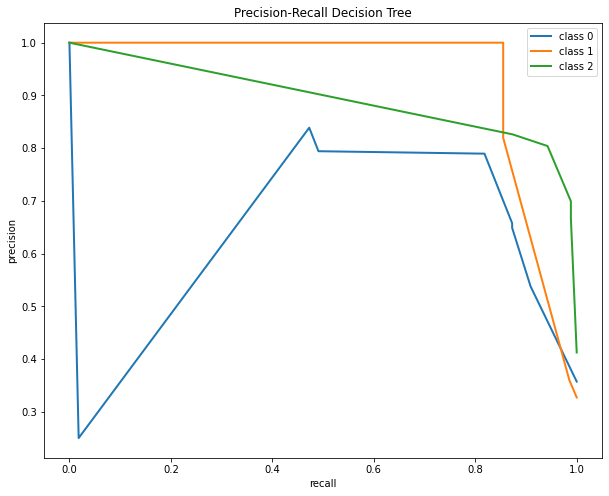

Accuracy de Decision Tree: 85.78
___Reporte Decision Tree (set de prueba)___
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        55
           1       1.00      0.86      0.92        69
           2       0.83      0.89      0.86        87

   micro avg       0.86      0.86      0.86       211
   macro avg       0.86      0.85      0.86       211
weighted avg       0.87      0.86      0.86       211
 samples avg       0.86      0.86      0.86       211



In [ ]:
DTovr = OneVsRestClassifier(DT1)
DTovr.fit(X_train, y_train)
y_pred_probDT = DTovr.predict_proba(X_test)


precision = dict()
recall = dict()

plt.figure(figsize=(10,8))
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_probDT[:, i]
                                                        )
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='best')
plt.title('Precision-Recall Decision Tree')
plt.show()


y_testDT = DT1.predict(X_test) 

print('Accuracy de Decision Tree:', round(DT1.score(X_test, y_test)*100, 2))
print('___Reporte Decision Tree (set de prueba)___')
print(classification_report(y_test, y_testDT, target_names=['0','1','2']), )

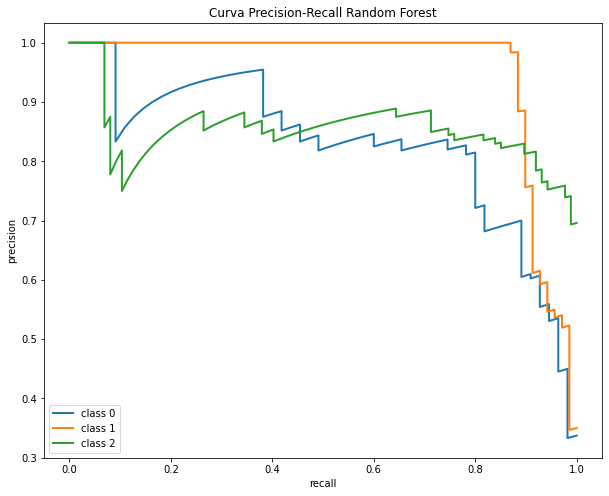

Accuracy de Random Forest: 81.52
___Reporte Random Forest (set de prueba)___
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        55
           1       0.98      0.87      0.92        69
           2       0.83      0.85      0.84        87

   micro avg       0.88      0.82      0.85       211
   macro avg       0.89      0.80      0.84       211
weighted avg       0.88      0.82      0.85       211
 samples avg       0.82      0.82      0.82       211



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
RFovr = OneVsRestClassifier(RF3)
RFovr.fit(X_train, y_train)
y_pred_probRF = RFovr.predict_proba(X_test)

precision = dict()
recall = dict()

plt.figure(figsize=(10,8))
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_probRF[:, i]
                                                        )
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')
plt.title('Curva Precision-Recall Random Forest')
plt.show()

y_testRF = RF3.predict(X_test) 

print('Accuracy de Random Forest:', round(RF3.score(X_test, y_test)*100, 2))
print('___Reporte Random Forest (set de prueba)___')
print(classification_report(y_test, y_testRF, target_names=['0','1','2']))

Como ya se habia evaluado el Random Forest tiene un amayor presicion, y dentro de las clases, la Uno representa mejor presicion que las demas clases

##Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión


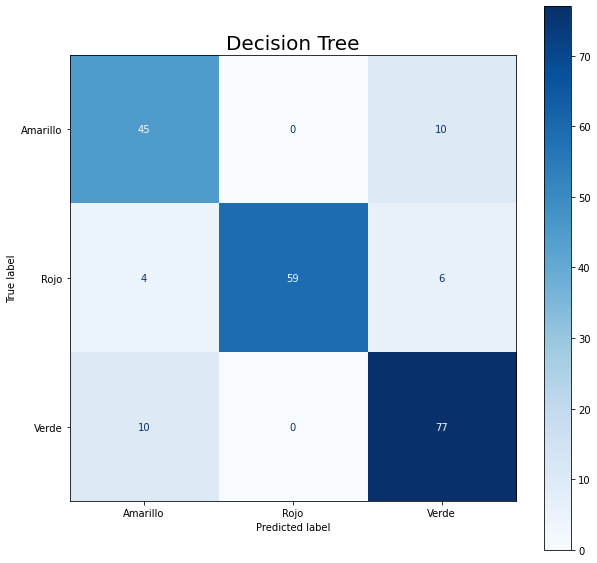

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_testDT.argmax(axis=1),
                                        display_labels=['Amarillo','Rojo','Verde'],
                                        cmap='Blues', ax=axs
                                        )

axs.set_title('Decision Tree', fontsize=20)
plt.show()

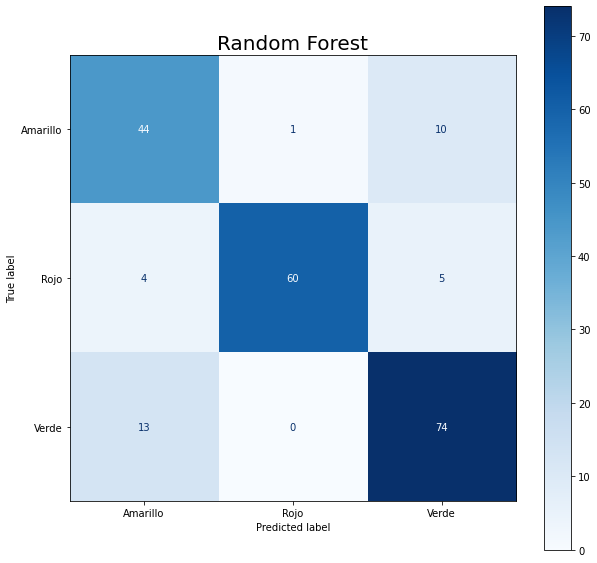

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_testRF.argmax(axis=1),
                                        display_labels=['Amarillo','Rojo','Verde'],
                                        cmap='Blues', ax=axs
                                        )

axs.set_title("Random Forest", fontsize=20)
plt.show()

Conclusiones:

Color Amarillo (clase 0) se puede decir que es donde genera mas equivoaciones, donde solo 44 se clasifica adecuadamanee mientras  4 las pone en rojo y 13 en verde.

El color Rojo (clase 1): en ambos modelos se genera una buena prediccion.


Color Verde (clase 2): tiene una mejor prediccion con el modelo Desicion Tree

